# Medical Insurance Prediction project using Machine Learning (Linear Regression)

## Importing the libraries for the model 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the data into the project


In [2]:
data=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\insurance.csv")

##  Data

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## The Information of the data


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## The No. of Cloumns and records of the Data

In [6]:
data.shape

(1338, 7)

## Column of the data 

In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## DataTypes

In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Checking Any Duplicates 

In [9]:
data.duplicated().any()

True

## Deleting The Duplicates

In [10]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
data1=data.drop_duplicates()

## Data After Deleting Duplicates

In [12]:
data1.shape

(1337, 7)

In [13]:
data1.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

## List of Numerical Values

In [14]:
num_colm=data1.select_dtypes(include="number").columns.to_list()
print(f"Numerical Columns in the data are {num_colm}")

Numerical Columns in the data are ['age', 'bmi', 'children', 'charges']


## List of Categorial Values

In [15]:
cat_colm=data1.select_dtypes(exclude="number").columns.to_list()
print(f"Categorial values in the data are {cat_colm}")

Categorial values in the data are ['sex', 'smoker', 'region']


## Statistical Measure of the Numerical Data

In [16]:
data1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Statistical Measure for the Categorial Data



In [17]:
data1.describe(exclude="number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


## Data Visualizations 

### Graphs for the Numerical Values

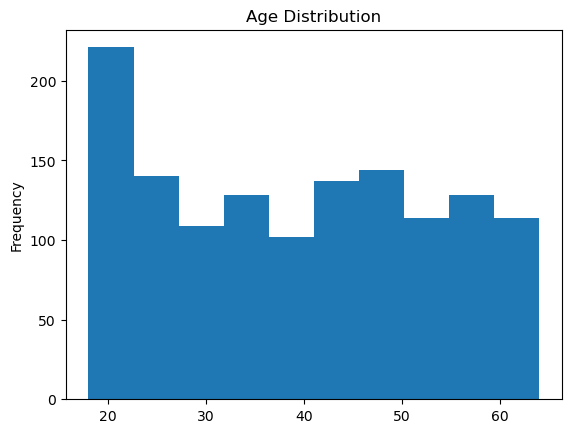

In [18]:
data1['age'].plot(kind='hist')
plt.title("Age Distribution")
plt.show()

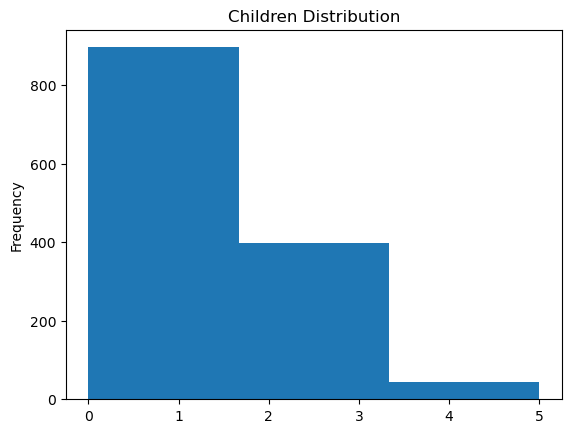

In [19]:
data1['children'].plot(kind='hist', bins=3)
plt.title("Children Distribution")
plt.show()

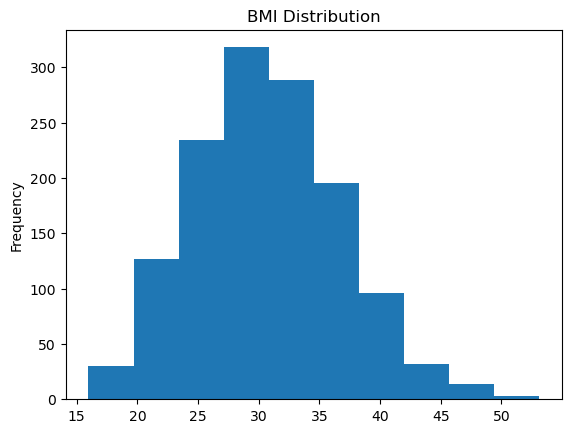

In [20]:
data1['bmi'].plot(kind='hist')
plt.title("BMI Distribution")
plt.show()

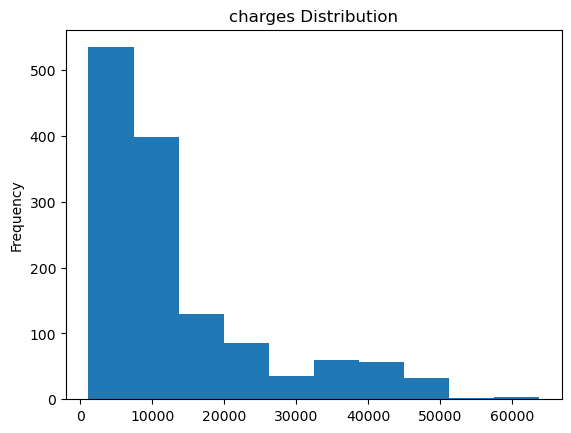

In [21]:
data1['charges'].plot(kind='hist')
plt.title("charges Distribution")
plt.show()

### Graphs for the Categorial Values

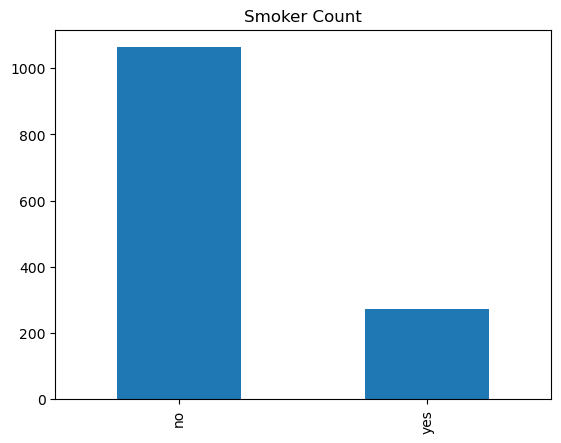

In [22]:
data1['smoker'].value_counts().plot(kind='bar')
plt.title("Smoker Count")
plt.show()

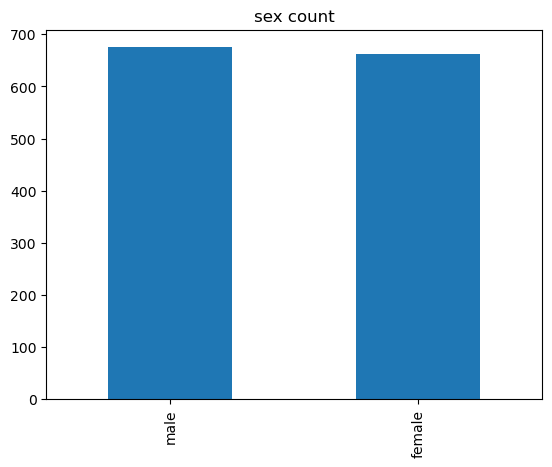

In [23]:
data1['sex'].value_counts().plot(kind='bar')
plt.title("sex count")
plt.show()

### PieChart for the Region Distribution

In [24]:
reg_count=data1['region'].value_counts()
reg_count

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

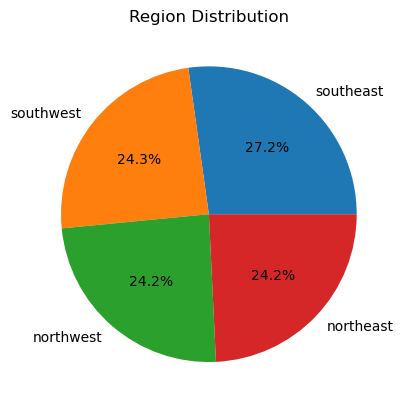

In [25]:

plt.pie(labels=reg_count.index,x=reg_count.values,
       autopct='%.1f%%'
       )
plt.title("Region Distribution")
plt.show()

### Correlation of the Data

In [26]:
corr_data=data1[['age','bmi','charges']].corr()
corr_data

,age,bmi,charges
age,1.000000,0.109344,0.298308
bmi,0.109344,1.000000,0.198401
charges,0.298308,0.198401,1.000000


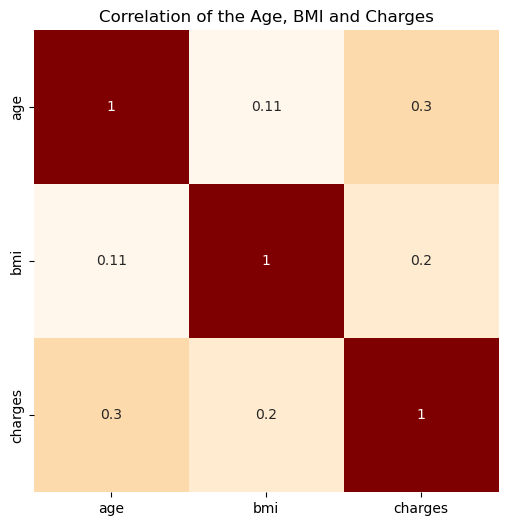

In [27]:
corr_data=data1[['age','bmi','charges']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(round(corr_data,2),annot=True, cmap="OrRd",cbar=False)
plt.title("Correlation of the Age, BMI and Charges")
plt.show()

### Cost for Smoker and Non-Smoker

In [28]:
smoker_f=data1.groupby('smoker')['charges'].mean().reset_index()
smoker_f

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


<Axes: xlabel='smoker'>

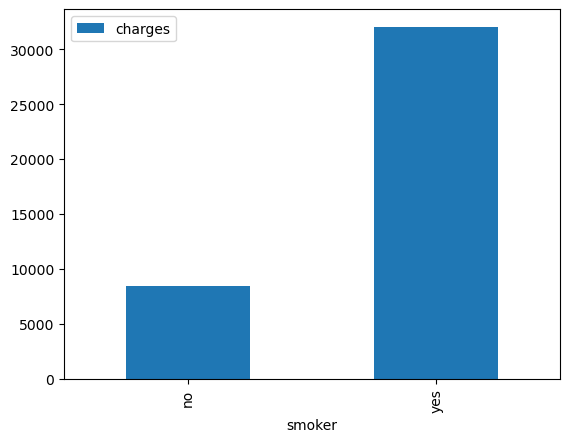

In [29]:
smoker_f.plot(kind="bar",x="smoker",y="charges")


### Cost for male and Female 

In [30]:
sex_f=data1.groupby('sex')['charges'].mean().reset_index()
sex_f

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

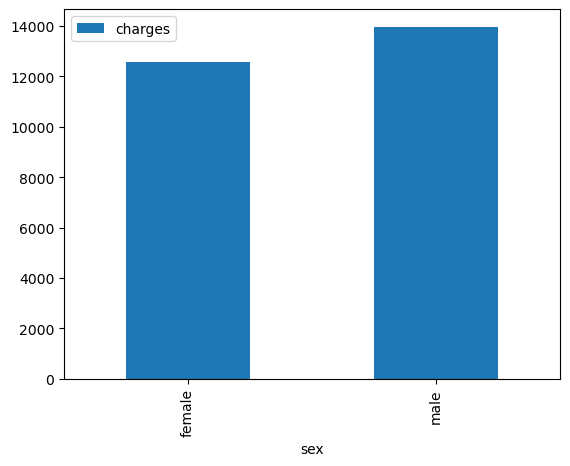

In [31]:
sex_f.plot(kind="bar", x="sex", y="charges")

### Region cost

In [32]:
region_f=data1.groupby('region')['charges'].mean().reset_index()
region_f

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region'>

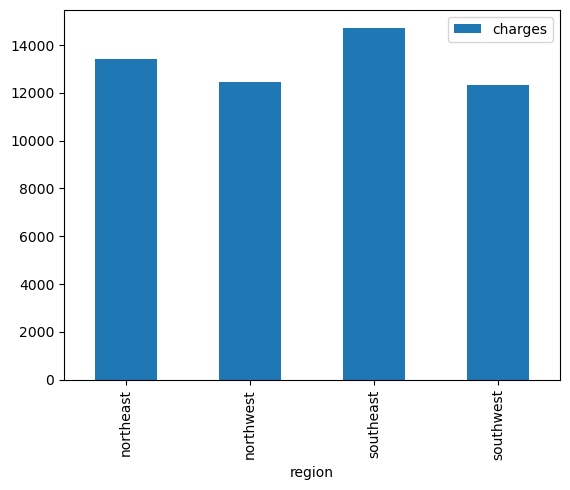

In [33]:
region_f.plot(kind="bar",x="region",y="charges")

### region wise bmi

In [34]:
reg_bmi=data1.groupby('region')['bmi'].mean().reset_index()
reg_bmi

,region,bmi
0,northeast,29.173503
1,northwest,29.195494
2,southeast,33.355989
3,southwest,30.596615


<Axes: >

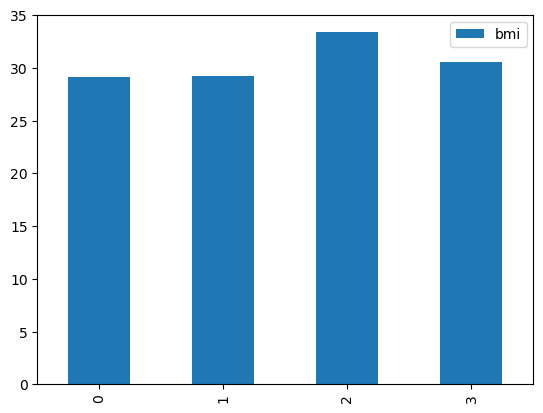

In [35]:
reg_bmi.plot(kind="bar")


## Data Model Creation

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
data1['sex']=le.fit_transform(data1['sex'])
data1['smoker']=le.fit_transform(data1['smoker'])
data1['region']=le.fit_transform(data1['region'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11236\3814606985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['sex']=le.fit_transform(data1['sex'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11236\3814606985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['smoker']=le.fit_transform(data1['smoker'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11236\3814606985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [38]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Dependent and Independent values

In [39]:
x=data1.drop(columns=["charges"],axis=1)
y=data1["charges"]

### Splitting the data into testing and training 

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

print(f"The shape of X train: {x_train.shape}")
print(f"The shape of X test: {x_test.shape}")

The shape of X train: (1069, 6)
The shape of X test: (268, 6)


In [42]:
print(f"The shape of y train: {y_train.shape}")
print(f"The shape of y train: {y_train.shape}")

The shape of y train: (1069,)
The shape of y train: (1069,)


In [43]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()

### Feature Scaling

In [44]:
x['age']=std_scale.fit_transform(np.array(x['age']).reshape(-1,1))
x['children']=std_scale.fit_transform(np.array(x['children']).reshape(-1,1))
x['bmi']=std_scale.fit_transform(np.array(x['bmi']).reshape(-1,1))

In [45]:
x

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


### Developing of Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
line_model=LinearRegression()

In [48]:
line_model.fit(x_train,y_train)

LinearRegression()

In [49]:
pred=(line_model.predict(x_test))

In [50]:
print("R2 score:",(r2_score(y_test,pred)))

NameError: name 'r2_score' is not defined

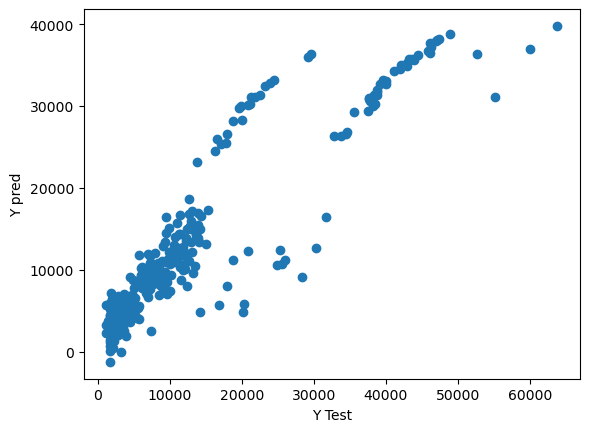

In [ ]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Y pred')
plt.show()

### Medical cost for the Southeast Female Smoker


In [ ]:
data={'age':45,'sex':0,'bmi':25,'children':3,'smoker':0,'region':2}
index=[0]
c_df=pd.DataFrame(data,index)
c_df

,age,sex,bmi,children,smoker,region
0,45,0,25,3,0,2


In [ ]:
female_nonsmoker_cost=line_model.predict(c_df)
print(" The medical insurance cost of the Smoker customer :",female_nonsmoker_cost)

 The medical insurance cost of the Smoker customer : [9089.03510539]


### Medical cost for the NorthEast Female Non-Smoker

In [ ]:
data1={'age':45,'sex':0,'bmi':25,'children':3,'smoker':1,'region':0}
index=[0]
c_df1=pd.DataFrame(data1,index)
c_df1

,age,sex,bmi,children,smoker,region
0,45,0,25,3,1,0


In [ ]:
female_smoker_cost=line_model.predict(c_df1)
print(" The medical insurance cost of the Northeast female Non-Smoker customer :",female_smoker_cost)

 The medical insurance cost of the Northeast female Non-Smoker customer : [32616.43815209]


### Medical cost for the NorthWest Male Smoker 

In [ ]:
data2={'age':45,'sex':1,'bmi':25,'children':3,'smoker':1,'region':1}
index=[0]
c_df2=pd.DataFrame(data2,index)
c_df2

,age,sex,bmi,children,smoker,region
0,45,1,25,3,1,1


In [ ]:
male_smoker_cost=line_model.predict(c_df2)
print(" The medical insurance cost of the Northwest Male Smoker customer :",male_smoker_cost)

 The medical insurance cost of the Northwest Male Smoker customer : [32279.11761043]


### Medical Cost for the SouthWest Male Non-Smoker

In [ ]:
data2={'age':45,'sex':1,'bmi':25,'children':3,'smoker':0,'region':3}
index=[0]
c_df3=pd.DataFrame(data2,index)
c_df3

,age,sex,bmi,children,smoker,region
0,45,1,25,3,0,3


In [ ]:
male_nonsmoker_cost=line_model.predict(c_df3)
print(" The medical insurance cost of the Southwest Male Non-Smoker customer :",male_nonsmoker_cost)

 The medical insurance cost of the Southwest Male Non-Smoker customer : [8751.71456374]
